In [142]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from data_utils import CustomImageDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import os
import torchvision

In [143]:
def imshow(img, title=None):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if title is not None:
        plt.title(title)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [144]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [145]:
transform0 = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0), std=(1)),
     transforms.Resize((28, 28)),
     ])

In [146]:
transform = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0), std=(1)),
     transforms.RandomAdjustSharpness(3, p=1),
     transforms.CenterCrop(28),
     transforms.GaussianBlur(1),

    #  transforms.Resize((28, 28)),
     ])

In [147]:
test_data_path = "./homework_2_dataset/dataset/test"
test_dataset = CustomImageDataset(os.path.join(test_data_path, "annotation.txt"), os.path.join(test_data_path, "imgs"), transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [148]:
proliv_data_path = "./homework_2_dataset/dataset/proliv"
proliv_dataset = CustomImageDataset(os.path.join(proliv_data_path, "annotation.txt"), os.path.join(proliv_data_path, "imgs"), transform=transform)
proliv_dataloader = DataLoader(proliv_dataset, batch_size=4, shuffle=True)

In [149]:
train_data_path = "./homework_2_dataset/dataset/train"
train_dataset = CustomImageDataset(os.path.join(train_data_path, "annotation.txt"), os.path.join(train_data_path, "imgs"), transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

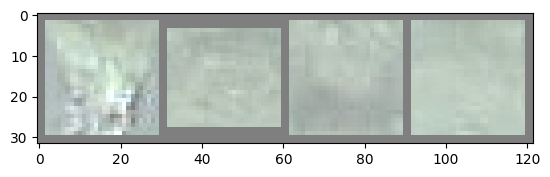

1 1 1 1


In [150]:
# get some random training images
labels = [0]
while int(labels[0]) != 1:
    dataiter = iter(test_dataloader)
    images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images.cpu()))
# print labels
print(' '.join(f'{int(labels[0])}' for j in range(4)))

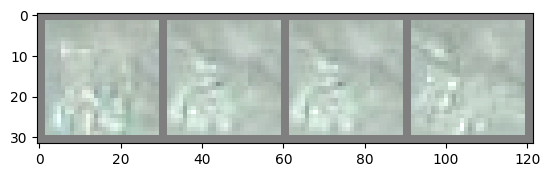

1 1 1 1


In [151]:
# get some random training images
dataiter = iter(proliv_dataloader)
images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images.cpu()))
# print labels
print(' '.join(f'{int(labels[0])}' for j in range(4)))

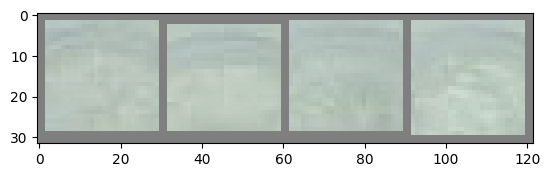

0 0 0 0


In [152]:
# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images.cpu()))
# print labels
print(' '.join(f'{int(labels[0])}' for j in range(4)))